In [1]:
include("jl/init_default.jl");

In [18]:
include("jl/all.jl")

load_raw_halos1600 (generic function with 3 methods)

In [19]:
to_rho!(pos,m, rho);

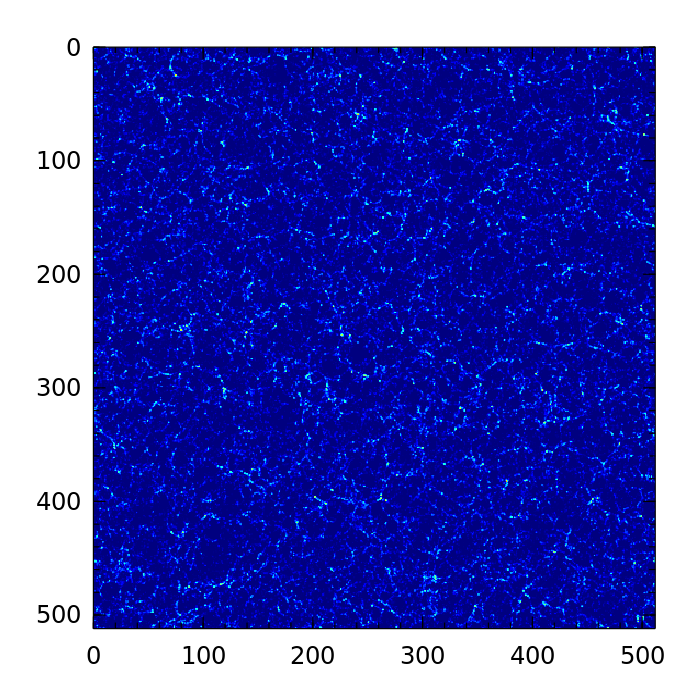

In [20]:
imrho = abs(real(rho[:,:,512]))# + real(rho[:,:,2]) + real(rho[:,:,3]))
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [21]:
to_delta!(rho);

In [22]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [23]:
@time from_cic_dim2!(c,pos,rho,1);

  6.496292 seconds (67.54 k allocations: 571.199 MB, 0.05% gc time)


In [24]:
_lvx = -D(1.0)*F(1.0)*Ha(1.0)*real(c);

In [25]:
std(_lvx)

424.23132f0

In [26]:
@time to_tlpt_delta!(rho);

  6.494705 seconds (940.48 k allocations: 1.037 GB, 0.30% gc time)


In [27]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [28]:
@time from_cic_dim2!(c,pos,rho,1);

  6.913261 seconds (45.19 k allocations: 570.169 MB, 0.45% gc time)


In [29]:
_lvx2 = D2(1.0)*F2(1.0)*Ha(1.0)*real(c);

In [30]:
std(_lvx2)

294.19135f0

In [31]:
kd = get_kd(pos);

In [32]:
get_slope_std_smoothed(_lvx-_lvx2/4, vx, pos, 10000.0, 100000)

(0.7021639434416632,32.83527950889455)

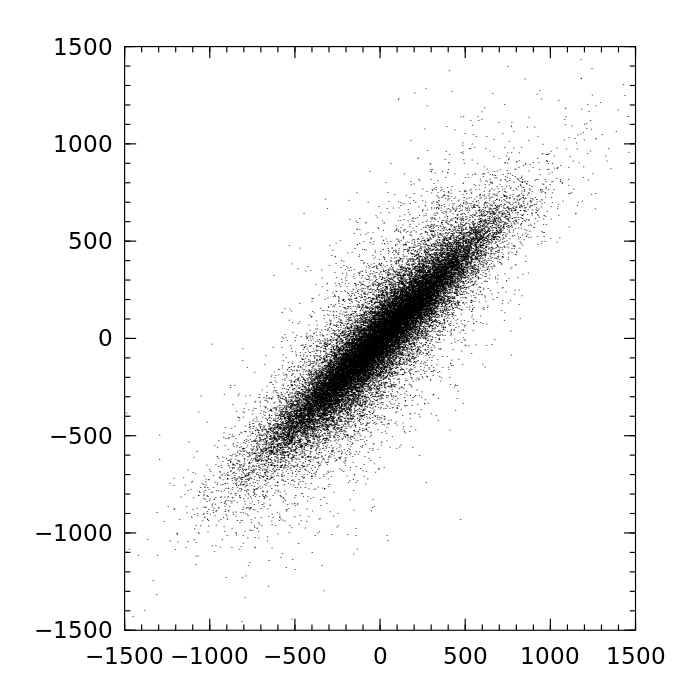

In [23]:
scatter((_lvx-_lvx2/3)[1:100:end], vx[1:100:end],0.00001)
xlim(-1500,1500)
ylim(-1500,1500)